# Covid19 Cases and Deaths for countries to put in mySQL Database 
# and Visualization

## Bring in libraries that are neeeded for Covid Data and Visualization

In [1]:
import urllib.request, json 
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## Get data from  European Centre for Disease Prevention and Control

Link for the European Center for Disease Prevention and Control to download current dataset.

In [2]:
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"

## Retrieve the data for the dataset

In [3]:
with urllib.request.urlopen(url) as url:
    data2 = json.loads(url.read().decode())

Put dataset into a pandas dataframe to make it easeir to work with
Dictionaries needed to be flattened to put into a dataframe.

In [4]:
data = pd.DataFrame.from_dict(pd.json_normalize(data2['records']))

## View the data from the dataset
See what columns are and titles.  Will format this later to our needs to add to mySQL database and then graph out the results. 

In [5]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,12/06/2020,12,6,2020,747,21,Afghanistan,AF,AFG,37172386,Asia
1,11/06/2020,11,6,2020,684,21,Afghanistan,AF,AFG,37172386,Asia
2,10/06/2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386,Asia
3,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386,Asia
4,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386,Asia


## Get data for SQLDataBase
Narrow down the columns that I need only for mySQL Database.

In [6]:
mySQLData = data[['dateRep','cases','deaths','countriesAndTerritories','countryterritoryCode']]

Rename the columns for easier typing and visualizaton.

In [7]:
mySQLData.rename(columns={'dateRep':'date', 'countriesAndTerritories':'country','countryterritoryCode':'countryCode'},
                 inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Reorder the columns in the order that I want them.

In [8]:
mySQLData = mySQLData[['countryCode','country','cases','deaths','date']]

Format the date as the datetime format for Python will not import into mySQL Database.

In [9]:
mySQLData['date'] = pd.to_datetime(mySQLData['date'],format='%d/%m/%Y')

## Create Database and only run once

mydb = mysql.connector.connect(host="127.0.0.1", user="root", passwd="root")

mycursor.execute("CREATE DATABASE Covid19")

Connect to mySQL Database to add tables, view tables, view table columns, add data and view data

In [10]:
mydb = mysql.connector.connect(host="127.0.0.1", user="root", passwd="root",database="Covid19")
mycursor = mydb.cursor()

View Databases in mySQL to confirm creation and existance.

In [11]:
mycursor.execute("SHOW DATABASES")
for x in mycursor:
  print(x) 

('assets',)
('covid19',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


## Create table and only run once

mycursor.execute("CREATE TABLE countries (countryCode VARCHAR(255),country VARCHAR(255), cases INT, deaths INT, date DATETIME)")

View tables in the current database.

In [12]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x) 

('countries',)


View the columns in the table countries.

In [13]:
mycursor.execute("DESCRIBE countries")
for x in mycursor:
  print(x) 

('countryCode', 'varchar(255)', 'YES', '', None, '')
('country', 'varchar(255)', 'YES', '', None, '')
('cases', 'int', 'YES', '', None, '')
('deaths', 'int', 'YES', '', None, '')
('date', 'datetime', 'YES', '', None, '')


## Put data into table by colums and in order this only runs once to insert data

for i in range(len(mySQLData)):

    sql = "INSERT INTO Covid19.countries (countryCode,country,cases, deaths, date) VALUES (%s, %s, %s, %s, %s)"
    val =(mySQLData.iloc[i,0],mySQLData.iloc[i,1],mySQLData.iloc[i,2],mySQLData.iloc[i,3],
    mySQLData.iloc[i,4].strftime('%Y/%m/%d'))
    mycursor.execute(sql, val)
    mydb.commit()

## Verify the data is in the database

In [14]:
mycursor.execute("SELECT * FROM countries")
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('AFG', 'Afghanistan', 915, 9, datetime.datetime(2020, 6, 6, 0, 0))
('AFG', 'Afghanistan', 787, 6, datetime.datetime(2020, 6, 5, 0, 0))
('AFG', 'Afghanistan', 758, 24, datetime.datetime(2020, 6, 4, 0, 0))
('AFG', 'Afghanistan', 759, 5, datetime.datetime(2020, 6, 3, 0, 0))
('AFG', 'Afghanistan', 545, 8, datetime.datetime(2020, 6, 2, 0, 0))
('AFG', 'Afghanistan', 680, 8, datetime.datetime(2020, 6, 1, 0, 0))
('AFG', 'Afghanistan', 866, 3, datetime.datetime(2020, 5, 31, 0, 0))
('AFG', 'Afghanistan', 623, 11, datetime.datetime(2020, 5, 30, 0, 0))
('AFG', 'Afghanistan', 580, 8, datetime.datetime(2020, 5, 29, 0, 0))
('AFG', 'Afghanistan', 625, 7, datetime.datetime(2020, 5, 28, 0, 0))
('AFG', 'Afghanistan', 658, 1, datetime.datetime(2020, 5, 27, 0, 0))
('AFG', 'Afghanistan', 591, 1, datetime.datetime(2020, 5, 26, 0, 0))
('AFG', 'Afghanistan', 584, 2, datetime.datetime(2020, 5, 25, 0, 0))
('AFG', 'Afghanistan', 782, 11, datetime.datetime(2020, 5, 24, 0, 0))
('AFG', 'Afghanistan', 540, 12, datet

('BEL', 'Belgium', 1298, 42, datetime.datetime(2020, 3, 27, 0, 0))
('BEL', 'Belgium', 668, 56, datetime.datetime(2020, 3, 26, 0, 0))
('BEL', 'Belgium', 526, 34, datetime.datetime(2020, 3, 25, 0, 0))
('BEL', 'Belgium', 342, 13, datetime.datetime(2020, 3, 24, 0, 0))
('BEL', 'Belgium', 586, 8, datetime.datetime(2020, 3, 23, 0, 0))
('BEL', 'Belgium', 558, 30, datetime.datetime(2020, 3, 22, 0, 0))
('BEL', 'Belgium', 462, 16, datetime.datetime(2020, 3, 21, 0, 0))
('BEL', 'Belgium', 309, 7, datetime.datetime(2020, 3, 20, 0, 0))
('BEL', 'Belgium', 243, 9, datetime.datetime(2020, 3, 19, 0, 0))
('BEL', 'Belgium', 158, 0, datetime.datetime(2020, 3, 18, 0, 0))
('BEL', 'Belgium', 199, 1, datetime.datetime(2020, 3, 17, 0, 0))
('BEL', 'Belgium', 197, 0, datetime.datetime(2020, 3, 16, 0, 0))
('BEL', 'Belgium', 130, 1, datetime.datetime(2020, 3, 15, 0, 0))
('BEL', 'Belgium', 160, 0, datetime.datetime(2020, 3, 14, 0, 0))
('BEL', 'Belgium', 85, 0, datetime.datetime(2020, 3, 13, 0, 0))
('BEL', 'Belgium', 

('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 24, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 23, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 22, 0, 0))
('CAN', 'Canada', 1, 0, datetime.datetime(2020, 2, 21, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 20, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 19, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 18, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 17, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 16, 0, 0))
('CAN', 'Canada', 1, 0, datetime.datetime(2020, 2, 15, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 14, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 13, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 12, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 11, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 10, 0, 0))
('CAN', 'Canada', 0, 0, datetime.datetime(2020, 2, 9, 0, 0))
('CAN', '

('COD', 'Democratic_Republic_of_the_Congo', 54, 2, datetime.datetime(2020, 5, 10, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 40, 3, datetime.datetime(2020, 5, 9, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 34, 0, datetime.datetime(2020, 5, 8, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 158, 2, datetime.datetime(2020, 5, 7, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 21, 0, datetime.datetime(2020, 5, 6, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 0, 0, datetime.datetime(2020, 5, 5, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 10, 1, datetime.datetime(2020, 5, 4, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 70, 1, datetime.datetime(2020, 5, 3, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 32, 1, datetime.datetime(2020, 5, 2, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 72, 0, datetime.datetime(2020, 5, 1, 0, 0))
('COD', 'Democratic_Republic_of_the_Congo', 9, 1, datetime.datetime(2020, 4, 30, 0, 0))
('COD', 'Democratic_Republic_of

('PYF', 'French_Polynesia', 1, 0, datetime.datetime(2020, 4, 1, 0, 0))
('PYF', 'French_Polynesia', 1, 0, datetime.datetime(2020, 3, 31, 0, 0))
('PYF', 'French_Polynesia', 1, 0, datetime.datetime(2020, 3, 30, 0, 0))
('PYF', 'French_Polynesia', 4, 0, datetime.datetime(2020, 3, 29, 0, 0))
('PYF', 'French_Polynesia', 0, 0, datetime.datetime(2020, 3, 28, 0, 0))
('PYF', 'French_Polynesia', 5, 0, datetime.datetime(2020, 3, 27, 0, 0))
('PYF', 'French_Polynesia', 0, 0, datetime.datetime(2020, 3, 26, 0, 0))
('PYF', 'French_Polynesia', 2, 0, datetime.datetime(2020, 3, 25, 0, 0))
('PYF', 'French_Polynesia', 5, 0, datetime.datetime(2020, 3, 24, 0, 0))
('PYF', 'French_Polynesia', 1, 0, datetime.datetime(2020, 3, 23, 0, 0))
('PYF', 'French_Polynesia', 2, 0, datetime.datetime(2020, 3, 22, 0, 0))
('PYF', 'French_Polynesia', 12, 0, datetime.datetime(2020, 3, 21, 0, 0))
('PYF', 'French_Polynesia', 0, 0, datetime.datetime(2020, 3, 20, 0, 0))
('PYF', 'French_Polynesia', 3, 0, datetime.datetime(2020, 3, 19,

('IND', 'India', 1335, 47, datetime.datetime(2020, 4, 21, 0, 0))
('IND', 'India', 1553, 36, datetime.datetime(2020, 4, 20, 0, 0))
('IND', 'India', 1334, 27, datetime.datetime(2020, 4, 19, 0, 0))
('IND', 'India', 991, 43, datetime.datetime(2020, 4, 18, 0, 0))
('IND', 'India', 1007, 23, datetime.datetime(2020, 4, 17, 0, 0))
('IND', 'India', 942, 37, datetime.datetime(2020, 4, 16, 0, 0))
('IND', 'India', 1075, 38, datetime.datetime(2020, 4, 15, 0, 0))
('IND', 'India', 1211, 31, datetime.datetime(2020, 4, 14, 0, 0))
('IND', 'India', 796, 35, datetime.datetime(2020, 4, 13, 0, 0))
('IND', 'India', 909, 34, datetime.datetime(2020, 4, 12, 0, 0))
('IND', 'India', 1035, 40, datetime.datetime(2020, 4, 11, 0, 0))
('IND', 'India', 678, 33, datetime.datetime(2020, 4, 10, 0, 0))
('IND', 'India', 540, 17, datetime.datetime(2020, 4, 9, 0, 0))
('IND', 'India', 773, 35, datetime.datetime(2020, 4, 8, 0, 0))
('IND', 'India', 354, 5, datetime.datetime(2020, 4, 7, 0, 0))
('IND', 'India', 693, 32, datetime.da

('KGZ', 'Kyrgyzstan', 17, 0, datetime.datetime(2020, 4, 16, 0, 0))
('KGZ', 'Kyrgyzstan', 19, 0, datetime.datetime(2020, 4, 15, 0, 0))
('KGZ', 'Kyrgyzstan', 11, 0, datetime.datetime(2020, 4, 14, 0, 0))
('KGZ', 'Kyrgyzstan', 42, 0, datetime.datetime(2020, 4, 13, 0, 0))
('KGZ', 'Kyrgyzstan', 38, 0, datetime.datetime(2020, 4, 12, 0, 0))
('KGZ', 'Kyrgyzstan', 41, 0, datetime.datetime(2020, 4, 11, 0, 0))
('KGZ', 'Kyrgyzstan', 18, 1, datetime.datetime(2020, 4, 10, 0, 0))
('KGZ', 'Kyrgyzstan', 10, 0, datetime.datetime(2020, 4, 9, 0, 0))
('KGZ', 'Kyrgyzstan', 42, 0, datetime.datetime(2020, 4, 8, 0, 0))
('KGZ', 'Kyrgyzstan', 12, 0, datetime.datetime(2020, 4, 7, 0, 0))
('KGZ', 'Kyrgyzstan', 72, 3, datetime.datetime(2020, 4, 6, 0, 0))
('KGZ', 'Kyrgyzstan', 0, 0, datetime.datetime(2020, 4, 5, 0, 0))
('KGZ', 'Kyrgyzstan', 19, 0, datetime.datetime(2020, 4, 4, 0, 0))
('KGZ', 'Kyrgyzstan', 13, 0, datetime.datetime(2020, 4, 3, 0, 0))
('KGZ', 'Kyrgyzstan', 5, 1, datetime.datetime(2020, 4, 2, 0, 0))
('KGZ

('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 23, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 22, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 21, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 20, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 19, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 18, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 17, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 16, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 15, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 14, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 13, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 12, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 11, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 10, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 9, 0, 0))
('MCO', 'Monaco', 0, 0, datetime.datetime(2020, 1, 8, 0, 0))
('MCO', 'M

('PAK', 'Pakistan', 605, 12, datetime.datetime(2020, 4, 27, 0, 0))
('PAK', 'Pakistan', 783, 16, datetime.datetime(2020, 4, 26, 0, 0))
('PAK', 'Pakistan', 785, 16, datetime.datetime(2020, 4, 25, 0, 0))
('PAK', 'Pakistan', 1406, 28, datetime.datetime(2020, 4, 24, 0, 0))
('PAK', 'Pakistan', 0, 0, datetime.datetime(2020, 4, 23, 0, 0))
('PAK', 'Pakistan', 533, 17, datetime.datetime(2020, 4, 22, 0, 0))
('PAK', 'Pakistan', 798, 16, datetime.datetime(2020, 4, 21, 0, 0))
('PAK', 'Pakistan', 425, 17, datetime.datetime(2020, 4, 20, 0, 0))
('PAK', 'Pakistan', 512, 16, datetime.datetime(2020, 4, 19, 0, 0))
('PAK', 'Pakistan', 456, 8, datetime.datetime(2020, 4, 18, 0, 0))
('PAK', 'Pakistan', 520, 11, datetime.datetime(2020, 4, 17, 0, 0))
('PAK', 'Pakistan', 517, 17, datetime.datetime(2020, 4, 16, 0, 0))
('PAK', 'Pakistan', 272, 11, datetime.datetime(2020, 4, 15, 0, 0))
('PAK', 'Pakistan', 342, 3, datetime.datetime(2020, 4, 14, 0, 0))
('PAK', 'Pakistan', 336, 7, datetime.datetime(2020, 4, 13, 0, 0))


('SAU', 'Saudi_Arabia', 1645, 7, datetime.datetime(2020, 5, 5, 0, 0))
('SAU', 'Saudi_Arabia', 1552, 8, datetime.datetime(2020, 5, 4, 0, 0))
('SAU', 'Saudi_Arabia', 1362, 7, datetime.datetime(2020, 5, 3, 0, 0))
('SAU', 'Saudi_Arabia', 1344, 7, datetime.datetime(2020, 5, 2, 0, 0))
('SAU', 'Saudi_Arabia', 1351, 5, datetime.datetime(2020, 5, 1, 0, 0))
('SAU', 'Saudi_Arabia', 1325, 5, datetime.datetime(2020, 4, 30, 0, 0))
('SAU', 'Saudi_Arabia', 1266, 8, datetime.datetime(2020, 4, 29, 0, 0))
('SAU', 'Saudi_Arabia', 1289, 5, datetime.datetime(2020, 4, 28, 0, 0))
('SAU', 'Saudi_Arabia', 1223, 3, datetime.datetime(2020, 4, 27, 0, 0))
('SAU', 'Saudi_Arabia', 1197, 9, datetime.datetime(2020, 4, 26, 0, 0))
('SAU', 'Saudi_Arabia', 1172, 6, datetime.datetime(2020, 4, 25, 0, 0))
('SAU', 'Saudi_Arabia', 1158, 7, datetime.datetime(2020, 4, 24, 0, 0))
('SAU', 'Saudi_Arabia', 1141, 5, datetime.datetime(2020, 4, 23, 0, 0))
('SAU', 'Saudi_Arabia', 1147, 6, datetime.datetime(2020, 4, 22, 0, 0))
('SAU', 'Sa

('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 28, 0, 0))
('SYR', 'Syria', 15, 0, datetime.datetime(2020, 5, 27, 0, 0))
('SYR', 'Syria', 20, 0, datetime.datetime(2020, 5, 26, 0, 0))
('SYR', 'Syria', 16, 0, datetime.datetime(2020, 5, 25, 0, 0))
('SYR', 'Syria', 11, 0, datetime.datetime(2020, 5, 24, 0, 0))
('SYR', 'Syria', 1, 1, datetime.datetime(2020, 5, 23, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 22, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 21, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 20, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 19, 0, 0))
('SYR', 'Syria', 7, 0, datetime.datetime(2020, 5, 18, 0, 0))
('SYR', 'Syria', 1, 0, datetime.datetime(2020, 5, 17, 0, 0))
('SYR', 'Syria', 2, 0, datetime.datetime(2020, 5, 16, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 15, 0, 0))
('SYR', 'Syria', 1, 0, datetime.datetime(2020, 5, 14, 0, 0))
('SYR', 'Syria', 0, 0, datetime.datetime(2020, 5, 13, 0, 0))
('SYR', 'Syria', 0, 

('VNM', 'Vietnam', 0, 0, datetime.datetime(2020, 4, 17, 0, 0))
('VNM', 'Vietnam', 0, 0, datetime.datetime(2020, 4, 16, 0, 0))
('VNM', 'Vietnam', 1, 0, datetime.datetime(2020, 4, 15, 0, 0))
('VNM', 'Vietnam', 3, 0, datetime.datetime(2020, 4, 14, 0, 0))
('VNM', 'Vietnam', 2, 0, datetime.datetime(2020, 4, 13, 0, 0))
('VNM', 'Vietnam', 4, 0, datetime.datetime(2020, 4, 12, 0, 0))
('VNM', 'Vietnam', 1, 0, datetime.datetime(2020, 4, 11, 0, 0))
('VNM', 'Vietnam', 2, 0, datetime.datetime(2020, 4, 10, 0, 0))
('VNM', 'Vietnam', 4, 0, datetime.datetime(2020, 4, 9, 0, 0))
('VNM', 'Vietnam', 0, 0, datetime.datetime(2020, 4, 8, 0, 0))
('VNM', 'Vietnam', 6, 0, datetime.datetime(2020, 4, 7, 0, 0))
('VNM', 'Vietnam', 4, 0, datetime.datetime(2020, 4, 6, 0, 0))
('VNM', 'Vietnam', 1, 0, datetime.datetime(2020, 4, 5, 0, 0))
('VNM', 'Vietnam', 4, 0, datetime.datetime(2020, 4, 4, 0, 0))
('VNM', 'Vietnam', 3, 0, datetime.datetime(2020, 4, 3, 0, 0))
('VNM', 'Vietnam', 21, 0, datetime.datetime(2020, 4, 2, 0, 0))

('BHR', 'Bahrain', 12, 0, datetime.datetime(2020, 4, 6, 0, 0))
('BHR', 'Bahrain', 45, 0, datetime.datetime(2020, 4, 5, 0, 0))
('BHR', 'Bahrain', 0, 0, datetime.datetime(2020, 4, 4, 0, 0))
('BHR', 'Bahrain', 74, 0, datetime.datetime(2020, 4, 3, 0, 0))
('BHR', 'Bahrain', 2, 0, datetime.datetime(2020, 4, 2, 0, 0))
('BHR', 'Bahrain', 52, 0, datetime.datetime(2020, 4, 1, 0, 0))
('BHR', 'Bahrain', 15, 0, datetime.datetime(2020, 3, 31, 0, 0))
('BHR', 'Bahrain', 27, 0, datetime.datetime(2020, 3, 30, 0, 0))
('BHR', 'Bahrain', 7, 0, datetime.datetime(2020, 3, 29, 0, 0))
('BHR', 'Bahrain', 8, 0, datetime.datetime(2020, 3, 28, 0, 0))
('BHR', 'Bahrain', 39, 1, datetime.datetime(2020, 3, 27, 0, 0))
('BHR', 'Bahrain', 29, 0, datetime.datetime(2020, 3, 26, 0, 0))
('BHR', 'Bahrain', 51, 1, datetime.datetime(2020, 3, 25, 0, 0))
('BHR', 'Bahrain', 5, 0, datetime.datetime(2020, 3, 24, 0, 0))
('BHR', 'Bahrain', 28, 1, datetime.datetime(2020, 3, 23, 0, 0))
('BHR', 'Bahrain', 21, 0, datetime.datetime(2020, 3

('CAN', 'Canada', 757, 222, datetime.datetime(2020, 6, 1, 0, 0))
('CAN', 'Canada', 772, 94, datetime.datetime(2020, 5, 31, 0, 0))
('CAN', 'Canada', 906, 102, datetime.datetime(2020, 5, 30, 0, 0))
('CAN', 'Canada', 993, 112, datetime.datetime(2020, 5, 29, 0, 0))
('CAN', 'Canada', 872, 126, datetime.datetime(2020, 5, 28, 0, 0))
('CAN', 'Canada', 936, 94, datetime.datetime(2020, 5, 27, 0, 0))
('CAN', 'Canada', 1012, 121, datetime.datetime(2020, 5, 26, 0, 0))
('CAN', 'Canada', 1078, 69, datetime.datetime(2020, 5, 25, 0, 0))
('CAN', 'Canada', 1141, 105, datetime.datetime(2020, 5, 24, 0, 0))
('CAN', 'Canada', 1156, 98, datetime.datetime(2020, 5, 23, 0, 0))
('CAN', 'Canada', 1222, 122, datetime.datetime(2020, 5, 22, 0, 0))
('CAN', 'Canada', 990, 118, datetime.datetime(2020, 5, 21, 0, 0))
('CAN', 'Canada', 1040, 70, datetime.datetime(2020, 5, 20, 0, 0))
('CAN', 'Canada', 1070, 60, datetime.datetime(2020, 5, 19, 0, 0))
('CAN', 'Canada', 1138, 103, datetime.datetime(2020, 5, 18, 0, 0))
('CAN', '

('DJI', 'Djibouti', 22, 0, datetime.datetime(2020, 5, 17, 0, 0))
('DJI', 'Djibouti', 25, 1, datetime.datetime(2020, 5, 16, 0, 0))
('DJI', 'Djibouti', 16, 0, datetime.datetime(2020, 5, 15, 0, 0))
('DJI', 'Djibouti', 12, 0, datetime.datetime(2020, 5, 14, 0, 0))
('DJI', 'Djibouti', 29, 0, datetime.datetime(2020, 5, 13, 0, 0))
('DJI', 'Djibouti', 17, 0, datetime.datetime(2020, 5, 12, 0, 0))
('DJI', 'Djibouti', 21, 0, datetime.datetime(2020, 5, 11, 0, 0))
('DJI', 'Djibouti', 54, 0, datetime.datetime(2020, 5, 10, 0, 0))
('DJI', 'Djibouti', 2, 0, datetime.datetime(2020, 5, 9, 0, 0))
('DJI', 'Djibouti', 13, 0, datetime.datetime(2020, 5, 8, 0, 0))
('DJI', 'Djibouti', 0, 1, datetime.datetime(2020, 5, 7, 0, 0))
('DJI', 'Djibouti', 4, 0, datetime.datetime(2020, 5, 6, 0, 0))
('DJI', 'Djibouti', 4, 0, datetime.datetime(2020, 5, 5, 0, 0))
('DJI', 'Djibouti', 0, 0, datetime.datetime(2020, 5, 4, 0, 0))
('DJI', 'Djibouti', 15, 0, datetime.datetime(2020, 5, 3, 0, 0))
('DJI', 'Djibouti', 8, 0, datetime.da

('GEO', 'Georgia', 8, 1, datetime.datetime(2020, 4, 8, 0, 0))
('GEO', 'Georgia', 14, 0, datetime.datetime(2020, 4, 7, 0, 0))
('GEO', 'Georgia', 17, 2, datetime.datetime(2020, 4, 6, 0, 0))
('GEO', 'Georgia', 9, 0, datetime.datetime(2020, 4, 5, 0, 0))
('GEO', 'Georgia', 27, 0, datetime.datetime(2020, 4, 4, 0, 0))
('GEO', 'Georgia', 6, 0, datetime.datetime(2020, 4, 3, 0, 0))
('GEO', 'Georgia', 5, 0, datetime.datetime(2020, 4, 2, 0, 0))
('GEO', 'Georgia', 12, 0, datetime.datetime(2020, 4, 1, 0, 0))
('GEO', 'Georgia', 8, 0, datetime.datetime(2020, 3, 31, 0, 0))
('GEO', 'Georgia', 5, 0, datetime.datetime(2020, 3, 30, 0, 0))
('GEO', 'Georgia', 4, 0, datetime.datetime(2020, 3, 29, 0, 0))
('GEO', 'Georgia', 2, 0, datetime.datetime(2020, 3, 28, 0, 0))
('GEO', 'Georgia', 6, 0, datetime.datetime(2020, 3, 27, 0, 0))
('GEO', 'Georgia', 3, 0, datetime.datetime(2020, 3, 26, 0, 0))
('GEO', 'Georgia', 9, 0, datetime.datetime(2020, 3, 25, 0, 0))
('GEO', 'Georgia', 7, 0, datetime.datetime(2020, 3, 24, 0, 

('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 17, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 16, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 15, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 14, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 13, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 12, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 11, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 10, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 9, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 8, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 7, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 6, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 5, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 4, 0, 0))
('IDN', 'Indonesia', 0, 0, datetime.datetime(2020, 2, 3, 0, 0))
('IDN', 'Indonesia', 0, 0, datet

('LVA', 'Latvia', 41, 0, datetime.datetime(2020, 3, 24, 0, 0))
('LVA', 'Latvia', 15, 0, datetime.datetime(2020, 3, 23, 0, 0))
('LVA', 'Latvia', 13, 0, datetime.datetime(2020, 3, 22, 0, 0))
('LVA', 'Latvia', 25, 0, datetime.datetime(2020, 3, 21, 0, 0))
('LVA', 'Latvia', 15, 0, datetime.datetime(2020, 3, 20, 0, 0))
('LVA', 'Latvia', 10, 0, datetime.datetime(2020, 3, 19, 0, 0))
('LVA', 'Latvia', 25, 0, datetime.datetime(2020, 3, 18, 0, 0))
('LVA', 'Latvia', 5, 0, datetime.datetime(2020, 3, 17, 0, 0))
('LVA', 'Latvia', 5, 0, datetime.datetime(2020, 3, 16, 0, 0))
('LVA', 'Latvia', 7, 0, datetime.datetime(2020, 3, 15, 0, 0))
('LVA', 'Latvia', 3, 0, datetime.datetime(2020, 3, 14, 0, 0))
('LVA', 'Latvia', 6, 0, datetime.datetime(2020, 3, 13, 0, 0))
('LVA', 'Latvia', 2, 0, datetime.datetime(2020, 3, 12, 0, 0))
('LVA', 'Latvia', 2, 0, datetime.datetime(2020, 3, 11, 0, 0))
('LVA', 'Latvia', 3, 0, datetime.datetime(2020, 3, 10, 0, 0))
('LVA', 'Latvia', 1, 0, datetime.datetime(2020, 3, 9, 0, 0))
('

('MEX', 'Mexico', 51, 2, datetime.datetime(2020, 3, 24, 0, 0))
('MEX', 'Mexico', 65, 0, datetime.datetime(2020, 3, 23, 0, 0))
('MEX', 'Mexico', 48, 0, datetime.datetime(2020, 3, 22, 0, 0))
('MEX', 'Mexico', 39, 2, datetime.datetime(2020, 3, 21, 0, 0))
('MEX', 'Mexico', 46, 0, datetime.datetime(2020, 3, 20, 0, 0))
('MEX', 'Mexico', 25, 0, datetime.datetime(2020, 3, 19, 0, 0))
('MEX', 'Mexico', 11, 0, datetime.datetime(2020, 3, 18, 0, 0))
('MEX', 'Mexico', 29, 0, datetime.datetime(2020, 3, 17, 0, 0))
('MEX', 'Mexico', 12, 0, datetime.datetime(2020, 3, 16, 0, 0))
('MEX', 'Mexico', 15, 0, datetime.datetime(2020, 3, 15, 0, 0))
('MEX', 'Mexico', 10, 0, datetime.datetime(2020, 3, 14, 0, 0))
('MEX', 'Mexico', 5, 0, datetime.datetime(2020, 3, 13, 0, 0))
('MEX', 'Mexico', 4, 0, datetime.datetime(2020, 3, 12, 0, 0))
('MEX', 'Mexico', 2, 0, datetime.datetime(2020, 3, 9, 0, 0))
('MEX', 'Mexico', 1, 0, datetime.datetime(2020, 3, 2, 0, 0))
('MEX', 'Mexico', 2, 0, datetime.datetime(2020, 3, 1, 0, 0))


('NGA', 'Nigeria', 114, 1, datetime.datetime(2020, 4, 25, 0, 0))
('NGA', 'Nigeria', 108, 3, datetime.datetime(2020, 4, 24, 0, 0))
('NGA', 'Nigeria', 91, 3, datetime.datetime(2020, 4, 23, 0, 0))
('NGA', 'Nigeria', 117, 3, datetime.datetime(2020, 4, 22, 0, 0))
('NGA', 'Nigeria', 38, 1, datetime.datetime(2020, 4, 21, 0, 0))
('NGA', 'Nigeria', 85, 2, datetime.datetime(2020, 4, 20, 0, 0))
('NGA', 'Nigeria', 49, 2, datetime.datetime(2020, 4, 19, 0, 0))
('NGA', 'Nigeria', 51, 4, datetime.datetime(2020, 4, 18, 0, 0))
('NGA', 'Nigeria', 35, 1, datetime.datetime(2020, 4, 17, 0, 0))
('NGA', 'Nigeria', 34, 1, datetime.datetime(2020, 4, 16, 0, 0))
('NGA', 'Nigeria', 30, 1, datetime.datetime(2020, 4, 15, 0, 0))
('NGA', 'Nigeria', 20, 0, datetime.datetime(2020, 4, 14, 0, 0))
('NGA', 'Nigeria', 5, 0, datetime.datetime(2020, 4, 13, 0, 0))
('NGA', 'Nigeria', 13, 3, datetime.datetime(2020, 4, 12, 0, 0))
('NGA', 'Nigeria', 17, 0, datetime.datetime(2020, 4, 11, 0, 0))
('NGA', 'Nigeria', 12, 1, datetime.dat

('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 6, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 5, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 4, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 3, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 2, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 2, 1, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 31, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 30, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 29, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 28, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 27, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 26, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 25, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 24, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 23, 0, 0))
('ROU', 'Romania', 0, 0, datetime.datetime(2020, 1, 22, 0, 0)

('KOR', 'South_Korea', 1, 0, datetime.datetime(2020, 1, 26, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 25, 0, 0))
('KOR', 'South_Korea', 1, 0, datetime.datetime(2020, 1, 24, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 23, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 22, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 21, 0, 0))
('KOR', 'South_Korea', 1, 0, datetime.datetime(2020, 1, 20, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 19, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 18, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 17, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 16, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 15, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 14, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 13, 0, 0))
('KOR', 'South_Korea', 0, 0, datetime.datetime(2020, 1, 12, 0,

('ARE', 'United_Arab_Emirates', 747, 2, datetime.datetime(2020, 5, 16, 0, 0))
('ARE', 'United_Arab_Emirates', 698, 2, datetime.datetime(2020, 5, 15, 0, 0))
('ARE', 'United_Arab_Emirates', 725, 3, datetime.datetime(2020, 5, 14, 0, 0))
('ARE', 'United_Arab_Emirates', 783, 2, datetime.datetime(2020, 5, 13, 0, 0))
('ARE', 'United_Arab_Emirates', 680, 3, datetime.datetime(2020, 5, 12, 0, 0))
('ARE', 'United_Arab_Emirates', 781, 13, datetime.datetime(2020, 5, 11, 0, 0))
('ARE', 'United_Arab_Emirates', 624, 11, datetime.datetime(2020, 5, 10, 0, 0))
('ARE', 'United_Arab_Emirates', 553, 9, datetime.datetime(2020, 5, 9, 0, 0))
('ARE', 'United_Arab_Emirates', 502, 8, datetime.datetime(2020, 5, 8, 0, 0))
('ARE', 'United_Arab_Emirates', 546, 11, datetime.datetime(2020, 5, 7, 0, 0))
('ARE', 'United_Arab_Emirates', 462, 9, datetime.datetime(2020, 5, 6, 0, 0))
('ARE', 'United_Arab_Emirates', 567, 11, datetime.datetime(2020, 5, 5, 0, 0))
('ARE', 'United_Arab_Emirates', 564, 7, datetime.datetime(2020, 5

## This is the end of the mySQL now going to visualization

## Get the top number of countries to visualize

Change here for number of top countries to view.

In [15]:
topCountries = 10

Can chose either linear to log data, log seems to better plot the data as it more accuretly visualizes the data looking at percentage change rather than just the number change.

In [16]:
typeOfChart = 'log' 

Setting for chart depending on size of countries selected.

In [17]:
if topCountries == 10:
    fSize = 15
elif topCountries == 20:
    fSize = 10
else:
    fSize =10

## Set the date as Index

Get the date from the dataframe columns.

In [18]:
date = data.dateRep 

Set the index of the dataset with the dates.

In [19]:
data.index = date

## Rename and rearrange columns to make it easier to use later

In [20]:
data.drop(data.columns[[0,1,2,3,7]],axis=1,inplace=True)

Rename columns make easier to read and work with.

In [21]:
data.rename(columns={'dateRep':'date', 'countriesAndTerritories':'country',
                     'countryterritoryCode':'countryCode'},inplace=True)

## The datatype in columns need to be changed to be able to plot, sum and average.

Remove underscores from country names to clean it up.

In [22]:
data['country'] = data['country'].str.replace("_"," ")

Change cases column data from objects to integers.

In [23]:
data['cases'] = data['cases'].astype(int)

Change deaths column data from objects to integers.

In [24]:
data['deaths'] = data['deaths'].astype(int)

sort data by index.

In [25]:
data.sort_index(axis=0)

,cases,deaths,country,countryCode,popData2018,continentExp
dateRep,,,,,,
01/01/2020,0,0,Lithuania,LTU,2789533,Europe
01/01/2020,0,0,San Marino,SMR,33785,Europe
01/01/2020,0,0,United Arab Emirates,ARE,9630959,Asia
01/01/2020,0,0,Brazil,BRA,209469333,America
01/01/2020,0,0,Iran,IRN,81800269,Asia
...,...,...,...,...,...,...
31/12/2019,0,0,United States of America,USA,327167434,America
31/12/2019,0,0,Canada,CAN,37058856,America
31/12/2019,0,0,Iran,IRN,81800269,Asia


## Sum the contries cases and deaths

Group the data by country then sum them.

In [26]:
total = data.groupby(['country']).sum()

Sort the number of cases by sum

In [27]:
data2 = total.sort_values("cases",ascending=False)

## Get the top countries and then get the list of countries

In [28]:
data3 = data2.head(topCountries)
countries = list(data3.index)

## Create dataframe to put data into to later plot
Since all countries cases did not start on the same date I will need to put the data in as days from first case.

This will be the number of columns max of dates length.

In [29]:
x = len(date)

Create new dataframe to put timeline cases in later.

In [30]:
timelineCases = pd.DataFrame(index=range(0),columns=range(x))

Column title will be numbers from number of days of cases.

In [31]:
columnTitles = list(range(1,x + 1))

Set the number of columns from above as names of columns.

In [32]:
timelineCases.columns = columnTitles

## In top countries remove dates and put as days for cases
Sorry for all the code comments below as I was not sure how to use markdown for this.  Hopefully you can overlook this ;)

In [33]:
for i in range(len(countries)):
    country = countries[i] #go through each country
    currentCountry = data[data.country == country] # Match the data to the country 
    a = pd.DataFrame(currentCountry['cases']).transpose() #view only cases into a dataframe 
    a = a.iloc[:, ::-1] # Get cases all the way to the end of the column
    a.index = [country] # Set country name as the index name
    # Remove columns with zeros to that all countries start day one with numbers
    zero_cols = [col for col, is_zero in ((a==0).sum() == a.shape[0]).items() if is_zero]  
    a.drop(zero_cols,axis=1, inplace=True)
    # Make a numerical list to rename columns
    bDays = list(range(1,(a.size)+1))
    a.columns = bDays# Add numerical list to column names
    timelineCases = pd.concat([timelineCases,a]) # Add the countries into the Dataframe that holds top countries

Now transpose axis and index and sum up all the numbers.

In [34]:
timelineCases = timelineCases.transpose()

Now add the number of cases per day to sum each day and move higher.

In [35]:
timelineCases = timelineCases.apply(lambda x: x + x.cumsum())

## Now plot the number of cases of countries

This is to put current or max date on plot.

In [36]:
maxDate = date[0]

Now to plot the dataset to plot the dataset to visualize the dataset to see how coronavirus 
cases are growing in different countries.

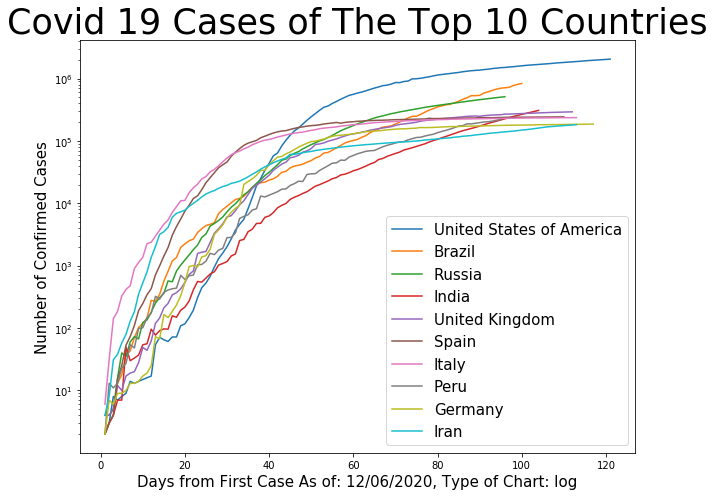

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('Number of Confirmed Cases', fontsize = 15)
ax.set_xlabel('Days from First Case As of: '+ (str(maxDate)[0:10]) +', Type of Chart: ' + typeOfChart, fontsize = 15)
ax.set_title('Covid 19 Cases of The Top '+ str(topCountries) + ' Countries', fontsize=35)
plt.plot(timelineCases, label = "All Cases of Covid 19")
if topCountries <= 10:
    ax.legend(labels = countries, loc='lower right',fontsize =fSize)
elif topCountries >10:
    ax.legend(labels = countries, loc='right',fontsize=fSize,bbox_to_anchor = (1.50, 0.5))
ax.set_yscale(typeOfChart)
fig.tight_layout()
plt.show()

## The dataset as of the 12th of June 2020 shows that United States is still number one in cases, but Brazil is catching up pretty fast.
Russia is up there with US and Brazil but the rest of the top countries seem to have leveled off.

## Create dataframe to put data into to later plot
Since all countries cases did not start on the same date I will need to put the data in as days from first case.

Create new dataframe to put timeline deaths in later.

In [38]:
timelineDeaths = pd.DataFrame(index=range(0),columns=range(x))

Column title will be numbers from number of days of deaths.

In [39]:
columnTitles = list(range(1,x + 1))

Set the number of columns from above as names of columns.

In [40]:
timelineDeaths.columns = columnTitles

## In top countries remove dates and put as days for deaths
Same as above cannot use markdown in a loop.

In [41]:
for i in range(len(countries)):
    country = countries[i] #go through each country
    currentCountry = data[data.country == country] # Match the data to the country 
    b = pd.DataFrame(currentCountry['deaths']).transpose() #view only deaths into a dataframe 
    b = b.iloc[:, ::-1] # Get deaths all the way to the end of the column
    b.index = [country] # Set country name as the index name
    # Remove columns with zeros to that all countries start day one with numbers
    zero_cols = [col for col, is_zero in ((b==0).sum() == b.shape[0]).items() if is_zero]
    b.drop(zero_cols,axis=1, inplace=True)
    # Make a numerical list to rename columns
    bDays = list(range(1,(b.size)+1))
    b.columns = bDays # Add numerical list to column names
    timelineDeaths = pd.concat([timelineDeaths,b]) # Add the countries into the Dataframe that holds top countries

Now transpose axis and index and sum up all the numbers.

In [42]:
timelineDeaths = timelineDeaths.transpose()

Now add the number of cases per day to sum each day and move higher.

In [43]:
timelineDeaths = timelineDeaths.apply(lambda x: x + x.cumsum())

## Now plot the number of deaths of countries

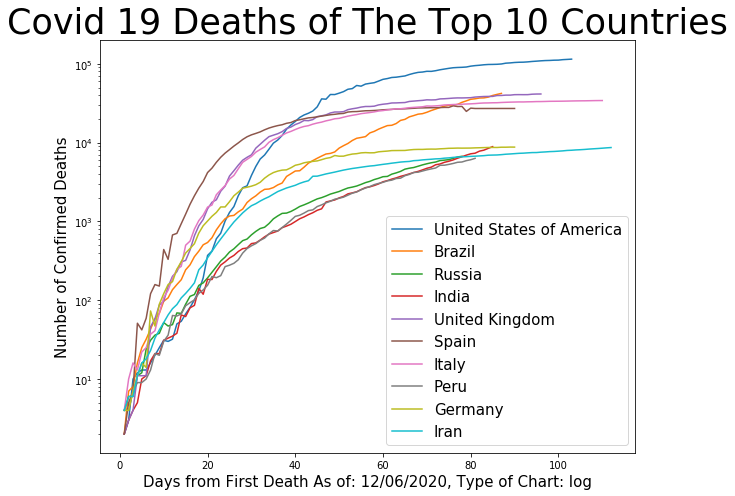

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('Number of Confirmed Deaths', fontsize = 15)
ax.set_xlabel('Days from First Death As of: '+ (str(maxDate)[0:10]) +', Type of Chart: ' + typeOfChart, fontsize = 15)
ax.set_title('Covid 19 Deaths of The Top '+ str(topCountries) + ' Countries', fontsize=35)
plt.plot(timelineDeaths, label = "All Deaths of Covid 19")
if topCountries <= 10:
    ax.legend(labels = countries, loc='lower right',fontsize =fSize)
elif topCountries >10:
    ax.legend(labels = countries, loc='right',fontsize=fSize,bbox_to_anchor = (1.50, 0.5))
ax.set_yscale(typeOfChart)
fig.tight_layout()
plt.show()

## Cases looked quite bad for USA, which they are, but we see for deaths it is also number one.  
UK, Italy and Spain are not good and also Brazil is catching up very fast.  This of course does not tell the
whole story as we now need to compare these numbers per population. 

# Now to look at per capita Data 

Create a dataframe to get the population of each country. 

In [45]:
pop = pd.DataFrame((data.groupby('country')['popData2018'].unique()),columns=['popData2018'])

Convert the dataframe object to string (not possible for some reason to go straight to int).  This was tough to get sorted but found this code on google and helped me sort it out. 

In [46]:
pop['popData2018'] = pop['popData2018'].str.get(0)

Convert the dataframe strings to int or integers.

In [47]:
pop['popData2018'] = pd.to_numeric(pop['popData2018'])

Create a new dataframe to sum up cases and deaths by country.

In [48]:
newDF = data.groupby(['country'])['cases','deaths'].sum()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Add the popluation of each country to the new Dataframe and round the data.  Divide by 1,000 to show cases and deaths per million.

In [49]:
newDF['population2018'] = round((pop['popData2018']/1000),2)

Drop lower populated countries as this will skew the numbers need to show large countries as these are where the most deaths are. 

In [50]:
newDF = newDF[(newDF['population2018'] > 3000)]

Create a column with the death rate per million.

In [51]:
newDF['Deaths per Million'] = round((newDF.deaths / newDF.population2018 * 100),2)

Create a new column with the cases rate per million.

In [52]:
newDF['Cases per Million'] = round((newDF.cases / newDF.population2018 * 100),2)

Drop NaN data if any.

In [53]:
newDF.dropna(inplace=True)

Covid19 Cases per Million Data and only with the top countries set above. 

In [54]:
casesPerMillion = newDF.sort_values(['Cases per Million'], ascending = False).head(topCountries)

Drop columns so only the data shows what is necessary to see cases per million.

In [55]:
casesPerMillion.drop(columns = ['deaths','Deaths per Million'])

,cases,population2018,Cases per Million
country,,,
Kuwait,34432,4137.31,832.23
Chile,154092,18729.16,822.74
Singapore,39387,5638.68,698.51
Peru,214788,31989.26,671.44
United States of America,2023347,327167.43,618.44
Belarus,51816,9485.39,546.27
Belgium,59711,11422.07,522.77
Ireland,25238,4853.51,519.99
Spain,242707,46723.75,519.45


## Above you can see a different picture than the graph.  Sadly, Ireland is in the top countries.  
Even though the United States is number one in cases and deaths they are not for cases per million. Important
to view the data in different ways to see the whole picture.

Now plot the cases per million to give a nice visual representation.

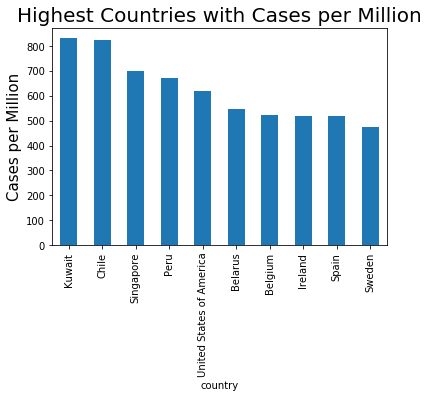

In [56]:
casesPerMillion['Cases per Million'].plot.bar()
plt.ylabel("Cases per Million", fontsize=15)
plt.title("Highest Countries with Cases per Million",fontsize=20)
plt.xticks(rotation=90);

Now get the death per million data for top countries.

In [57]:
deathsPerMillion = newDF.sort_values(['Deaths per Million'], ascending = False).head(topCountries)

Remove any columns that are needed to view this representation.

In [58]:
deathsPerMillion.drop(columns = ['cases','Cases per Million'])

,deaths,population2018,Deaths per Million
country,,,
Belgium,9636,11422.07,84.36
United Kingdom,41279,66488.99,62.08
Spain,27136,46723.75,58.08
Italy,34167,60431.28,56.54
Sweden,4814,10183.17,47.27
France,29346,66987.24,43.81
Ireland,1703,4853.51,35.09
Netherlands,6044,17231.02,35.08
United States of America,113820,327167.43,34.79


## Another different picture of the covid19 stats.  
Most country with deaths per million at the top are in Europe.  Which again is shocking and sadly Ireland is up there as well.  The United States is up there but it is not bad as initially thought in the line plots.

Now plot the death per million data. 

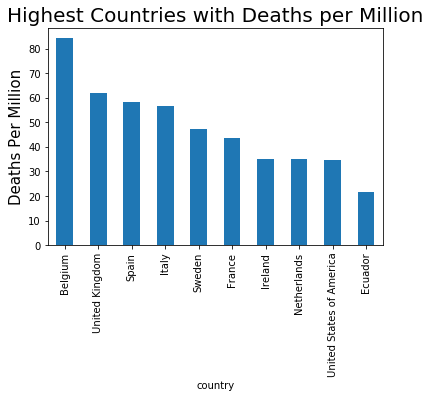

In [59]:
deathsPerMillion['Deaths per Million'].plot.bar()
plt.ylabel("Deaths Per Million",fontsize=15)
plt.title("Highest Countries with Deaths per Million",fontsize=20)
plt.xticks(rotation=90);

## Another part to analyze of the data is the ratios.  
This will give some insight at which countries are doing well and which are doing poorly.  

Select countries with deaths of 100 or more to remove outliers in our ratios. 

In [60]:
dfCountry = newDF[(newDF.deaths >= 100)]

Create a dataset with the worst ratio of deaths to cases.  This will show how many people died that contracted covid19.

In [61]:
worstCaseRatio = round(((dfCountry.deaths / dfCountry.cases)*100),2).sort_values(ascending=False).head(topCountries)

Create a dataset with the best ratio of deaths to cases.  This will show how many people died that contracted covid19.

In [62]:
bestCaseRatio = round(((dfCountry.deaths / dfCountry.cases)*100),2).sort_values(ascending=False).tail(topCountries)

Plot the data of the worst countries first. 

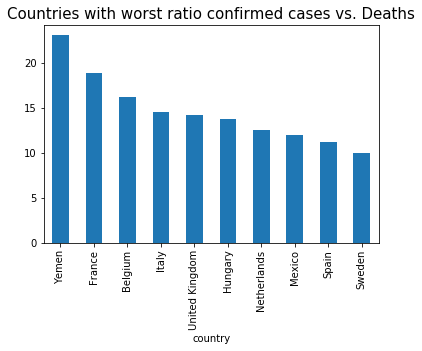

In [63]:
worstCaseRatio.plot.bar()
plt.title("Countries with worst ratio confirmed cases vs. Deaths",fontsize= 15)
plt.xticks(rotation=90);

## In this plot we can see many European countries. 
Yemen is number one, which here is not where you want to be number one. The remaining countries are in Europe and sadly Mexico is on this list that did not appear on any other list before.  Good news is the Ireland is not on this list now onto plot the best countries.

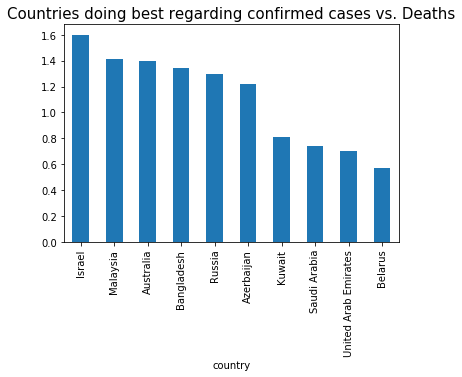

In [64]:
bestCaseRatio.plot.bar()
plt.title("Countries doing best regarding confirmed cases vs. Deaths",fontsize= 15)
plt.xticks(rotation=90);

## Mixed bag of best countries.  
As we can see here it seems to be not one continent but all around the world for the best countries.  I do doubt Russia and middle east country data, not that we are 100% truthful in Ireland with the numbers.  How can Russia have so many cases with so little deaths that no one else has done?  Just a thought. 

## Now get continent data
Group by continent and sum all the cases and deaths again.

In [65]:
countries = data.groupby(['continentExp']).sum()

Get continents to put in with countries.

In [66]:
continents = data.groupby(['country'])['continentExp'].unique()

Sum the cases and deaths .

In [67]:
countries = data.groupby(['country']).sum()

Add continents to dataset and convert to strings.

In [68]:
countries['continent'] = continents.str.get(0)

Add populations to the countries from above.

In [69]:
countries['population'] = newDF['population2018']

Group all the countries now by continent.

In [70]:
finalDF = countries.groupby('continent').sum()

Now plot the data to show cases and deaths by continent.

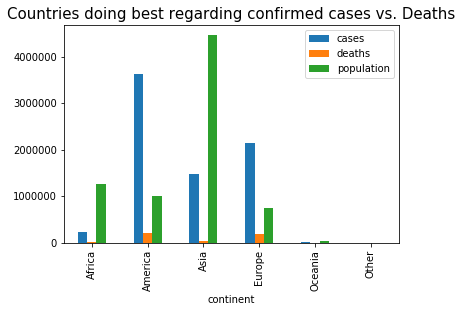

In [71]:
finalDF.plot.bar()
plt.title("Countries doing best regarding confirmed cases vs. Deaths",fontsize= 15)
plt.xticks(rotation=90);

## Asia with the highest population and Americas with larges Cases and Deaths.
On the plot above we can see that the Americas are by far the highest number of cases followed by Europe. 
What we see above also is that Europe and the Americas seem to have the same number of deaths.  I will display the actual numbers below.

In [72]:
finalDF.head()

,cases,deaths,population
continent,,,
Africa,216622,5838,1251300.13
America,3639394,196069,997642.60
Asia,1481097,37627,4461597.55
Europe,2134496,181518,742770.58
Oceania,8758,131,38484.19


Europe and the Americas are almost the same with the number of deaths, but populations are more in the Americas.  Let us finally look at one last plot to look at the per million data to compare properly.

First create a dataframe and get number of cases per million.

In [73]:
continentStats = pd.DataFrame()
continentStats['Cases Per Million'] = round((finalDF.cases / finalDF.population * 100),2)

Create a new column with the deaths per million. 

In [74]:
continentStats['Deaths per Million'] = round((finalDF.deaths / finalDF.population * 100),2)

Plot the data to visually see the different continents death per million.

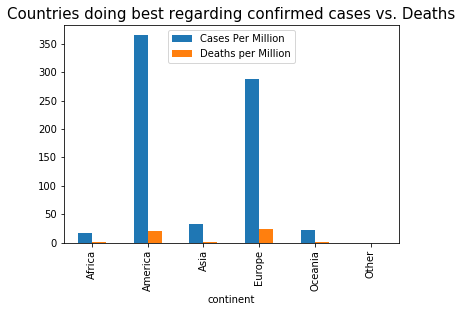

In [75]:
continentStats.plot.bar()
plt.title("Countries doing best regarding confirmed cases vs. Deaths",fontsize= 15)
plt.xticks(rotation=90);

As Seen in previous plots the Americas have the highest number of cases by far and has same number of deaths per million.  This could be because the Americas are behind Europe and we will see if deaths per million will increase.  I will display the numbers to accurately compare the numbers. 

In [76]:
continentStats.head()

,Cases Per Million,Deaths per Million
continent,,
Africa,17.31,0.47
America,364.80,19.65
Asia,33.20,0.84
Europe,287.37,24.44
Oceania,22.76,0.34


Now that I put the numbers Europe has the highest deaths per million as this was not evident in the previous plot.  Again this could be due to the lag difference.  Europe went first and now it is in the Americas.  Continuing to view this data and plot it the story will change and the final numbers will be interesting.